In [23]:
from metpy.units import units
import metpy.calc as mpcalc

units.hPa

<Unit('hectopascal')>

In [57]:
import numpy as np

for tempo in pd.to_datetime(df_s.time).unique():
    df_probe = df_s[pd.to_datetime(df_s['time']) == tempo]
    df_probe.reset_index(inplace = True)
    
    pressure_values = df_probe['pressure'].to_numpy()
    temperature_values = df_probe['temperature'].to_numpy()
    dewpoint_values = df_probe['dewpoint'].to_numpy()
    
    vals, unq_indices, c = np.unique(pressure_values, return_index=True, return_counts=True)
    dup = vals[c > 1]
    
    if(len(dup)>0):
        idx_vals_repeated = np.where(c > 1)[0]
        vals_repeated = vals[idx_vals_repeated]

        print(unq_indices)
        print(pressure_values)
        print(idx_vals_repeated)
        print(vals_repeated)

        print(vals)
        print(c)
        print(dup)
        print(pressure_values)
        print(temperature_values)
        print(dewpoint_values)
        break

[79 78 77 76 75 74 73 72 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55
 54 53 52 51 50 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31
 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7
  6  5  4  3  2  1  0]
[1012.  1000.   925.   913.   850.   795.   746.   718.   709.   700.
  689.   634.   630.   622.   618.   603.   581.   546.   529.   500.
  491.   469.   456.   429.   402.   400.   388.   364.   359.   352.
  338.   331.   322.   317.   303.   301.   300.   299.   280.   259.
  252.   250.   248.   238.   236.   213.   208.   200.   192.   176.
  167.   160.   150.   149.   141.   109.   103.   101.   100.    79.6
   77.    75.5   70.    67.9   64.4   62.    61.1   58.1   52.4   50.
   47.4   47.4   42.9   41.1   40.8   38.8   37.    36.9   35.1   32. ]
[8]
[47.4]
[  32.    35.1   36.9   37.    38.8   40.8   41.1   42.9   47.4   50.
   52.4   58.1   61.1   62.    64.4   67.9   70.    75.5   77.    79.6
  100.   101.   103.   109.   141.   149.  

In [34]:
from metpy.calc import dewpoint_from_relative_humidity, parcel_profile
from metpy.units import units
# pressure
p = [1008., 1000., 950., 900., 850., 800., 750., 700., 650., 600.,
     550., 500., 450., 400., 350., 300., 250., 200.,
     175., 150., 125., 100., 80., 70., 60., 50.,
     40., 30., 25., 20.] * units.hPa
# temperature
T = [29.3, 28.1, 23.5, 20.9, 18.4, 15.9, 13.1, 10.1, 6.7, 3.1,
     -0.5, -4.5, -9.0, -14.8, -21.5, -29.7, -40.0, -52.4,
     -59.2, -66.5, -74.1, -78.5, -76.0, -71.6, -66.7, -61.3,
     -56.3, -51.7, -50.7, -47.5] * units.degC
# relative humidity
rh = [.85, .65, .36, .39, .82, .72, .75, .86, .65, .22, .52,
      .66, .64, .20, .05, .75, .76, .45, .25, .48, .76, .88,
      .56, .88, .39, .67, .15, .04, .94, .35] * units.dimensionless
# calculate dewpoint
Td = dewpoint_from_relative_humidity(T, rh)
# computer parcel temperature
parcel_profile(p, T[0], Td[0]).to('degC')

Magnitude,[29.30000000000001 29.30000000000001 25.222147384020218 23.460975347242083 21.58359279560426 19.57260398482498 17.406361852039822 15.057486153977663 12.490648661013665 9.659253895822644 6.500234908917548 2.9256036460892005 -1.1917284638130354 -6.04257883658039 -11.924975168790468 -19.317653604943246 -28.976724644755308 -41.94444385189527 -50.011730762116485 -59.3093624797491 -70.02760604264736 -82.53084922667225 -94.29667129619958 -100.99074330775701 -108.4082993349599 -116.77024488747216 -126.42910221755437 -138.0064958359133 -144.8661588565159 -152.7896702869799]
Units,degree_Celsius


In [54]:
import numpy as np

def replace_duplicates_with_mean(arr):
    unique_arr = np.unique(arr)
    mean_values = np.zeros_like(unique_arr, dtype=np.float32)

    for i, value in enumerate(unique_arr):
        mean_values[i] = np.mean(arr[arr == value])

    return mean_values[np.searchsorted(unique_arr, arr)]

# example usage
arr = np.array([1, 2, 2, 3, 3, 3])
result = replace_duplicates_with_mean(arr)
print(result)


[1. 2. 2. 3. 3. 3.]


In [58]:
import numpy as np

def find_duplicate_indices(arr):
    """
    Takes a NumPy array as input and returns the indices of the duplicate values.
    """
    # Get the unique values and their counts
    unique_vals, val_counts = np.unique(arr, return_counts=True)

    # Find the indices where the counts are greater than 1
    duplicate_indices = np.where(val_counts > 1)[0]

    # Get the indices of the duplicate values
    indices = []
    for val in unique_vals[duplicate_indices]:
        indices.append(np.where(arr == val)[0])

    return np.concatenate(indices)

# Example usage
arr = np.array([1, 2, 3, 2, 4, 1])
duplicate_indices = find_duplicate_indices(arr)
print(duplicate_indices)


[0 5 1 3]


In [63]:
import numpy as np

def find_duplicates(arr):
    # Get the unique elements and their counts
    unique, counts = np.unique(arr, return_counts=True)
    
    # Find the indices of elements that have more than one occurrence
    duplicate_indices = np.where(counts > 1)[0]
    
    # Get the values and indices of the duplicate elements
    duplicate_values = unique[duplicate_indices]
    duplicate_indices = [np.where(arr == value)[0] for value in duplicate_values]
    
    return duplicate_indices, duplicate_values

# Example usage
arr1 = np.array([1, 1, 2, 2, 3, 3, 5, 6])
arr2 = np.array([0, 1, 2, 3, 4, 5, 6, 7])
indices, values = find_duplicates(arr1)
print("Indices of duplicate values:", indices)
print("Duplicate values:", values)

print(arr1[indices[0]])
print(arr1[indices[1]])
print(arr1[indices[2]])

Indices of duplicate values: [array([0, 1]), array([2, 3]), array([4, 5])]
Duplicate values: [1 2 3]
[1 1]
[2 2]
[3 3]


In [1]:
input_file = '../data/sounding_stations/2012-02-02.csv'
    
dtype_dict = {'pressure': 'float',
                  'height': 'float',
                  'temperature': 'float',
                  'dewpoint': 'float',
                  'direction': 'float',
                  'speed': 'float',
                  'u_wind': 'float',
                  'v_wind': 'float',
                  'station': 'str',
                  'station_number': 'int',
                  'time': 'str',
                  'latitude': 'float',
                  'longitude': 'float',
                  'elevation': 'float',
                  'pw': 'float'}

df_s = pd.read_csv(input_file, header=0, dtype=dtype_dict, on_bad_lines='skip')
df_s.head(22)

NameError: name 'pd' is not defined

In [77]:
df_s = df_s.dropna()
#df_s.reset_index(inplace = True)
df_s.head(23)

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation,pw
0,47.0,21006.0,-67.9,-88.2,100.0,29.0,-28.559425,5.035797e+00,SBGL,83746,2012-02-01,-22.81,-43.25,42.0,43.09
1,40.0,21987.0,-66.0,-89.5,80.0,38.0,-37.422695,-6.598631e+00,SBGL,83746,2012-02-01,-22.81,-43.25,42.0,43.09
2,37.0,22462.0,-65.0,-90.2,95.0,32.0,-31.878230,2.788984e+00,SBGL,83746,2012-02-01,-22.81,-43.25,42.0,43.09
3,35.0,22800.0,-64.3,-90.6,80.0,33.0,-32.498656,-5.730390e+00,SBGL,83746,2012-02-01,-22.81,-43.25,42.0,43.09
4,33.0,23158.0,-63.6,-91.1,90.0,39.0,-39.000000,-2.388061e-15,SBGL,83746,2012-02-01,-22.81,-43.25,42.0,43.09
5,32.0,23345.0,-63.2,-91.4,85.0,32.0,-31.878230,-2.788984e+00,SBGL,83746,2012-02-01,-22.81,-43.25,42.0,43.09
6,30.7,23597.0,-62.7,-91.7,91.0,37.0,-36.994365,6.457390e-01,SBGL,83746,2012-02-01,-22.81,-43.25,42.0,43.09
7,30.0,23740.0,-61.1,-91.1,95.0,40.0,-39.847788,3.486230e+00,SBGL,83746,2012-02-01,-22.81,-43.25,42.0,43.09
8,25.4,24789.0,-54.7,-86.7,100.0,54.0,-53.179619,9.377002e+00,SBGL,83746,2012-02-01,-22.81,-43.25,42.0,43.09
10,70.0,18660.0,-74.5,-90.5,95.0,30.0,-29.885841,2.614672e+00,SBGL,83746,2012-02-02,-22.81,-43.25,42.0,0.00


# utc_to_local

In [1]:
import pytz
from datetime import datetime

def utc_to_local(utc_string, local_tz, format_string):
    '''
    The function first converts the UTC string to a datetime object with timezone information 
    using strptime() and replace(). Then it converts the datetime object to the local timezone 
    using astimezone(). Finally, it formats the resulting datetime as a string in the same
    format as the input string.

    Here's an example usage of the function:
    
        utc_string = '1972-09-13 12:00:00'
        local_tz = 'America/Sao_Paulo'
        format_string = '%Y-%m-%d %H:%M'
        local_string = utc_to_local(utc_string, local_tz, format_string)
        print(local_string)

    '''
    # convert utc string to datetime object
    utc_dt = datetime.strptime(utc_string, format_string).replace(tzinfo=pytz.UTC)
    
    # convert to local timezone
    local_tz = pytz.timezone(local_tz)
    local_dt = utc_dt.astimezone(local_tz)
    
    # format as string and return
    return local_dt.strftime(format_string)

In [2]:
pytz.all_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Timbuktu', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'Ameri

In [3]:
utc_string = '1972-09-13 12:00'
local_tz = 'America/Sao_Paulo'
format_string = '%Y-%m-%d %H:%M'
local_string = utc_to_local(utc_string, local_tz, format_string)
print(local_string)

1972-09-13 09:00


# Load weather station data

In [4]:
import pandas as pd
df_ws = pd.read_csv('../data/weather_stations/A652_2020_2022.csv')
df_ws.head(10)

,Unnamed: 0,DC_NOME,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,UF,RAD_GLO,PTO_INS,TEM_MIN,...,VEN_VEL,PTO_MIN,TEM_MAX,TEN_BAT,VEN_RAJ,TEM_CPU,TEM_INS,UMD_INS,CD_ESTACAO,HR_MEDICAO
0,0,RIO DE JANEIRO - FORTE DE COPACABANA,1004.2,24.3,-22.988333,1004.2,RJ,-3.4,19.7,22.8,...,1.9,19.2,24.3,12.7,3.5,26.0,24.0,77.0,A652,0
1,1,RIO DE JANEIRO - FORTE DE COPACABANA,1004.9,26.1,-22.988333,1004.9,RJ,-3.1,20.6,23.5,...,1.2,19.6,24.7,12.7,3.8,26.0,24.7,78.0,A652,100
2,2,RIO DE JANEIRO - FORTE DE COPACABANA,1005.0,27.3,-22.988333,1005.1,RJ,-3.2,20.7,23.4,...,1.6,19.3,26.5,12.7,4.0,26.0,26.5,70.0,A652,200
3,3,RIO DE JANEIRO - FORTE DE COPACABANA,1004.7,26.8,-22.988333,1005.0,RJ,-3.4,20.3,26.1,...,1.7,20.2,27.1,12.6,4.3,27.0,26.2,70.0,A652,300
4,4,RIO DE JANEIRO - FORTE DE COPACABANA,1004.4,26.9,-22.988333,1004.7,RJ,-3.3,20.6,24.2,...,1.5,19.2,26.4,12.6,4.4,27.0,25.9,73.0,A652,400
5,5,RIO DE JANEIRO - FORTE DE COPACABANA,1003.7,24.4,-22.988333,1004.4,RJ,-3.3,20.2,23.7,...,2.6,19.5,26.0,12.6,4.7,26.0,24.9,75.0,A652,500
6,6,RIO DE JANEIRO - FORTE DE COPACABANA,1003.3,26.1,-22.988333,1003.7,RJ,-3.4,20.0,24.9,...,1.9,19.9,25.9,12.6,4.7,26.0,25.8,71.0,A652,600
7,7,RIO DE JANEIRO - FORTE DE COPACABANA,1003.4,25.3,-22.988333,1003.5,RJ,-3.5,19.4,24.2,...,1.1,19.2,25.8,12.6,3.7,26.0,24.2,74.0,A652,700
8,8,RIO DE JANEIRO - FORTE DE COPACABANA,1003.7,24.4,-22.988333,1003.7,RJ,-3.1,19.8,22.7,...,2.6,19.2,25.3,12.5,4.7,25.0,25.1,72.0,A652,800
9,9,RIO DE JANEIRO - FORTE DE COPACABANA,1004.1,25.9,-22.988333,1004.1,RJ,148.0,19.5,25.0,...,1.3,19.3,25.7,12.8,4.7,26.0,25.0,72.0,A652,900


In [5]:
df_ws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    26304 non-null  int64  
 1   DC_NOME       26304 non-null  object 
 2   PRE_INS       25829 non-null  float64
 3   TEM_SEN       25175 non-null  float64
 4   VL_LATITUDE   26304 non-null  float64
 5   PRE_MAX       25820 non-null  float64
 6   UF            26304 non-null  object 
 7   RAD_GLO       25825 non-null  float64
 8   PTO_INS       25595 non-null  float64
 9   TEM_MIN       25819 non-null  float64
 10  VL_LONGITUDE  26304 non-null  float64
 11  UMD_MIN       25583 non-null  float64
 12  PTO_MAX       25579 non-null  float64
 13  VEN_DIR       25422 non-null  float64
 14  DT_MEDICAO    26304 non-null  object 
 15  CHUVA         25829 non-null  float64
 16  PRE_MIN       25820 non-null  float64
 17  UMD_MAX       25583 non-null  float64
 18  VEN_VEL       25408 non-nu

In [6]:
def format_time(input_str):
    '''
    This function first converts the input string to an integer using the int function. 
    It then extracts the hours and minutes from the input integer using integer division and modulus operations. 
    Finally, it formats the output string using f-strings to ensure that both hours and minutes are represented with two digits.
    Usage examples:
        print(format_time("100"))   # Output: "01:00"
        print(format_time("1200"))  # Output: "12:00"
        print(format_time("2300"))  # Output: "23:00"
    '''
    # Convert input string to integer
    input_int = int(input_str)
    
    # Extract hours and minutes from the input integer
    hours = input_int // 100
    minutes = input_int % 100
    
    # Format the output string
    output_str = f"{hours:02}:{minutes:02}"
    
    return output_str

In [7]:
df_ws.HR_MEDICAO.apply(format_time)

0        00:00
1        01:00
2        02:00
3        03:00
4        04:00
         ...  
26299    19:00
26300    20:00
26301    21:00
26302    22:00
26303    23:00
Name: HR_MEDICAO, Length: 26304, dtype: object

In [8]:
df_ws.DT_MEDICAO

0        2020-01-01
1        2020-01-01
2        2020-01-01
3        2020-01-01
4        2020-01-01
            ...    
26299    2022-12-31
26300    2022-12-31
26301    2022-12-31
26302    2022-12-31
26303    2022-12-31
Name: DT_MEDICAO, Length: 26304, dtype: object

In [9]:
df_ws['time'] = df_ws.DT_MEDICAO + ' ' + df_ws.HR_MEDICAO.apply(format_time)

In [10]:
df_ws['time']

0        2020-01-01 00:00
1        2020-01-01 01:00
2        2020-01-01 02:00
3        2020-01-01 03:00
4        2020-01-01 04:00
               ...       
26299    2022-12-31 19:00
26300    2022-12-31 20:00
26301    2022-12-31 21:00
26302    2022-12-31 22:00
26303    2022-12-31 23:00
Name: time, Length: 26304, dtype: object

In [11]:
df_ws['Datetime'] = pd.to_datetime(df_ws.DT_MEDICAO + ' ' + df_ws.HR_MEDICAO.apply(format_time))

In [12]:
df_ws.head()

,Unnamed: 0,DC_NOME,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,UF,RAD_GLO,PTO_INS,TEM_MIN,...,TEM_MAX,TEN_BAT,VEN_RAJ,TEM_CPU,TEM_INS,UMD_INS,CD_ESTACAO,HR_MEDICAO,time,Datetime
0,0,RIO DE JANEIRO - FORTE DE COPACABANA,1004.2,24.3,-22.988333,1004.2,RJ,-3.4,19.7,22.8,...,24.3,12.7,3.5,26.0,24.0,77.0,A652,0,2020-01-01 00:00,2020-01-01 00:00:00
1,1,RIO DE JANEIRO - FORTE DE COPACABANA,1004.9,26.1,-22.988333,1004.9,RJ,-3.1,20.6,23.5,...,24.7,12.7,3.8,26.0,24.7,78.0,A652,100,2020-01-01 01:00,2020-01-01 01:00:00
2,2,RIO DE JANEIRO - FORTE DE COPACABANA,1005.0,27.3,-22.988333,1005.1,RJ,-3.2,20.7,23.4,...,26.5,12.7,4.0,26.0,26.5,70.0,A652,200,2020-01-01 02:00,2020-01-01 02:00:00
3,3,RIO DE JANEIRO - FORTE DE COPACABANA,1004.7,26.8,-22.988333,1005.0,RJ,-3.4,20.3,26.1,...,27.1,12.6,4.3,27.0,26.2,70.0,A652,300,2020-01-01 03:00,2020-01-01 03:00:00
4,4,RIO DE JANEIRO - FORTE DE COPACABANA,1004.4,26.9,-22.988333,1004.7,RJ,-3.3,20.6,24.2,...,26.4,12.6,4.4,27.0,25.9,73.0,A652,400,2020-01-01 04:00,2020-01-01 04:00:00


In [13]:
df_ws['Datetime']

0       2020-01-01 00:00:00
1       2020-01-01 01:00:00
2       2020-01-01 02:00:00
3       2020-01-01 03:00:00
4       2020-01-01 04:00:00
                ...        
26299   2022-12-31 19:00:00
26300   2022-12-31 20:00:00
26301   2022-12-31 21:00:00
26302   2022-12-31 22:00:00
26303   2022-12-31 23:00:00
Name: Datetime, Length: 26304, dtype: datetime64[ns]

In [14]:
df_ws = df_ws.set_index(pd.DatetimeIndex(df_ws['Datetime']))

In [15]:
df_ws = df_ws.drop(['HR_MEDICAO','DT_MEDICAO','Unnamed: 0', 'DC_NOME', 'CD_ESTACAO', 'UF', 'Datetime'], axis=1)

In [16]:
df_ws.tail()

,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,UMD_MIN,PTO_MAX,...,UMD_MAX,VEN_VEL,PTO_MIN,TEM_MAX,TEN_BAT,VEN_RAJ,TEM_CPU,TEM_INS,UMD_INS,time
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-12-31 19:00:00,1009.6,28.4,-22.988333,1010.5,1913.8,24.8,24.4,-43.190556,95.0,25.6,...,100.0,1.0,24.0,25.6,14.2,2.9,29.0,24.8,100.0,2022-12-31 19:00
2022-12-31 20:00:00,1010.0,NaN,-22.988333,1010.1,1077.9,NaN,24.0,-43.190556,NaN,NaN,...,NaN,0.9,NaN,24.8,13.3,2.8,28.0,24.7,NaN,2022-12-31 20:00
2022-12-31 21:00:00,1009.9,NaN,-22.988333,1010.2,260.3,NaN,23.9,-43.190556,NaN,NaN,...,NaN,1.0,NaN,24.7,13.2,2.8,27.0,23.9,NaN,2022-12-31 21:00
2022-12-31 22:00:00,1010.3,NaN,-22.988333,1010.3,30.2,NaN,23.3,-43.190556,NaN,NaN,...,NaN,0.7,NaN,24.0,12.5,2.6,26.0,23.5,NaN,2022-12-31 22:00
2022-12-31 23:00:00,1010.7,NaN,-22.988333,1010.7,-2.2,NaN,23.3,-43.190556,NaN,NaN,...,NaN,1.7,NaN,25.0,12.5,5.7,26.0,25.0,NaN,2022-12-31 23:00


In [17]:
df_ws.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26304 entries, 2020-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PRE_INS       25829 non-null  float64
 1   TEM_SEN       25175 non-null  float64
 2   VL_LATITUDE   26304 non-null  float64
 3   PRE_MAX       25820 non-null  float64
 4   RAD_GLO       25825 non-null  float64
 5   PTO_INS       25595 non-null  float64
 6   TEM_MIN       25819 non-null  float64
 7   VL_LONGITUDE  26304 non-null  float64
 8   UMD_MIN       25583 non-null  float64
 9   PTO_MAX       25579 non-null  float64
 10  VEN_DIR       25422 non-null  float64
 11  CHUVA         25829 non-null  float64
 12  PRE_MIN       25820 non-null  float64
 13  UMD_MAX       25583 non-null  float64
 14  VEN_VEL       25408 non-null  float64
 15  PTO_MIN       25579 non-null  float64
 16  TEM_MAX       25819 non-null  float64
 17  TEN_BAT       25829 non-null  floa

# Load sounding data

In [18]:
import pandas as pd
df_sounding = pd.read_csv('../data/sounding_stations/SBGL_indexes_2022-01-01_2022-12-31.csv')
df_sounding.head()

,time,cape,cin,lift,k,total_totals,showalter
0,2022-01-01 00:00:00,1147.704144,-48.135452,-276.000916,33.5,42.9,0.723299
1,2022-01-02 00:00:00,259.097715,-170.717647,-274.979475,39.1,46.8,-1.641964
2,2022-01-03 00:00:00,2427.450449,-40.744951,-278.511704,38.8,44.4,0.063668
3,2022-01-04 00:00:00,885.409861,-91.924625,-276.229623,39.7,45.6,-0.920404
4,2022-01-05 00:00:00,887.508955,-172.932892,-275.037476,37.0,43.6,0.131104


In [19]:
df_sounding.tail()

,time,cape,cin,lift,k,total_totals,showalter
603,2022-12-27 12:00:00,2756.140607,-63.543990,-279.222716,35.2,42.0,3.134060
604,2022-12-28 12:00:00,2179.125206,-34.789814,-278.548333,22.7,45.6,0.349621
605,2022-12-29 12:00:00,1255.902881,-56.589516,-276.844915,36.2,46.2,-0.289720
606,2022-12-30 12:00:00,2373.591061,0.000000,-278.734297,36.8,44.6,-0.503270
607,2022-12-31 12:00:00,877.487383,-76.785774,-276.626183,38.5,47.9,-1.194518


In [20]:
df_sounding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   time          608 non-null    object 
 1   cape          608 non-null    float64
 2   cin           608 non-null    float64
 3   lift          608 non-null    float64
 4   k             608 non-null    float64
 5   total_totals  608 non-null    float64
 6   showalter     608 non-null    float64
dtypes: float64(6), object(1)
memory usage: 33.4+ KB


In [21]:
df_sounding['time']

0      2022-01-01 00:00:00
1      2022-01-02 00:00:00
2      2022-01-03 00:00:00
3      2022-01-04 00:00:00
4      2022-01-05 00:00:00
              ...         
603    2022-12-27 12:00:00
604    2022-12-28 12:00:00
605    2022-12-29 12:00:00
606    2022-12-30 12:00:00
607    2022-12-31 12:00:00
Name: time, Length: 608, dtype: object

In [22]:
format_string = '%Y-%m-%d %H:%M:%S'
df_sounding['time'] = df_sounding['time'].apply(lambda x: utc_to_local(x, "America/Sao_paulo", format_string))

In [23]:
df_sounding['time']

0      2021-12-31 21:00:00
1      2022-01-01 21:00:00
2      2022-01-02 21:00:00
3      2022-01-03 21:00:00
4      2022-01-04 21:00:00
              ...         
603    2022-12-27 09:00:00
604    2022-12-28 09:00:00
605    2022-12-29 09:00:00
606    2022-12-30 09:00:00
607    2022-12-31 09:00:00
Name: time, Length: 608, dtype: object

In [24]:
format = '%Y-%m-%d %H:%M:%S'
df_sounding['Datetime'] = pd.to_datetime(df_sounding['time'], format=format)
df_sounding = df_sounding.set_index(pd.DatetimeIndex(df_sounding['Datetime']))
df_sounding = df_sounding.drop(['time', 'Datetime'], axis = 1)

In [25]:
df_sounding.head()

,cape,cin,lift,k,total_totals,showalter
Datetime,,,,,,
2021-12-31 21:00:00,1147.704144,-48.135452,-276.000916,33.5,42.9,0.723299
2022-01-01 21:00:00,259.097715,-170.717647,-274.979475,39.1,46.8,-1.641964
2022-01-02 21:00:00,2427.450449,-40.744951,-278.511704,38.8,44.4,0.063668
2022-01-03 21:00:00,885.409861,-91.924625,-276.229623,39.7,45.6,-0.920404
2022-01-04 21:00:00,887.508955,-172.932892,-275.037476,37.0,43.6,0.131104


# Merge dataframes

In [26]:
import pandas as pd

# create example dataframes
df1 = pd.DataFrame({'datetime': ['2022-01-01 00:00:00', '2022-01-02 00:00:00', '2022-01-03 00:00:00'],
                    'value': [1, 2, 3]})

df2 = pd.DataFrame({'datetime': ['2022-01-01 00:00:00', '2022-01-03 00:00:00'],
                    'other_value': ['a', 'b']})

# convert datetime columns to datetime format
df1['datetime'] = pd.to_datetime(df1['datetime'])
df2['datetime'] = pd.to_datetime(df2['datetime'])

# merge dataframes on datetime column
merged_df = pd.merge(df1, df2, on='datetime', how='inner')

print(merged_df)


    datetime  value other_value
0 2022-01-01      1           a
1 2022-01-03      3           b


In [27]:
# merge dataframes on datetime column
merged_df = pd.merge(df_ws, df_sounding, on='Datetime', how='left')
merged_df.head(24)

,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,UMD_MIN,PTO_MAX,...,TEM_CPU,TEM_INS,UMD_INS,time,cape,cin,lift,k,total_totals,showalter
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,1004.2,24.3,-22.988333,1004.2,-3.4,19.7,22.8,-43.190556,77.0,20.4,...,26.0,24.0,77.0,2020-01-01 00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,1004.9,26.1,-22.988333,1004.9,-3.1,20.6,23.5,-43.190556,77.0,20.9,...,26.0,24.7,78.0,2020-01-01 01:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,1005.0,27.3,-22.988333,1005.1,-3.2,20.7,23.4,-43.190556,70.0,21.0,...,26.0,26.5,70.0,2020-01-01 02:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,1004.7,26.8,-22.988333,1005.0,-3.4,20.3,26.1,-43.190556,68.0,20.7,...,27.0,26.2,70.0,2020-01-01 03:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,1004.4,26.9,-22.988333,1004.7,-3.3,20.6,24.2,-43.190556,69.0,20.9,...,27.0,25.9,73.0,2020-01-01 04:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 05:00:00,1003.7,24.4,-22.988333,1004.4,-3.3,20.2,23.7,-43.190556,71.0,20.9,...,26.0,24.9,75.0,2020-01-01 05:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 06:00:00,1003.3,26.1,-22.988333,1003.7,-3.4,20.0,24.9,-43.190556,70.0,20.4,...,26.0,25.8,71.0,2020-01-01 06:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 07:00:00,1003.4,25.3,-22.988333,1003.5,-3.5,19.4,24.2,-43.190556,70.0,20.2,...,26.0,24.2,74.0,2020-01-01 07:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,1003.7,24.4,-22.988333,1003.7,-3.1,19.8,22.7,-43.190556,72.0,20.4,...,25.0,25.1,72.0,2020-01-01 08:00,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
merged_df.tail(20)

,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,UMD_MIN,PTO_MAX,...,TEM_CPU,TEM_INS,UMD_INS,time,cape,cin,lift,k,total_totals,showalter
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-12-31 04:00:00,1010.0,NaN,-22.988333,1011.3,-3.1,NaN,20.9,-43.190556,NaN,NaN,...,22.0,21.0,NaN,2022-12-31 04:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-31 05:00:00,1010.4,NaN,-22.988333,1010.4,-3.3,NaN,20.5,-43.190556,NaN,NaN,...,22.0,20.5,NaN,2022-12-31 05:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-31 06:00:00,1010.3,NaN,-22.988333,1010.4,-3.2,NaN,20.3,-43.190556,NaN,NaN,...,22.0,20.5,NaN,2022-12-31 06:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-31 07:00:00,1010.3,NaN,-22.988333,1010.3,-2.3,NaN,20.4,-43.190556,NaN,NaN,...,22.0,20.5,NaN,2022-12-31 07:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-31 08:00:00,1011.1,NaN,-22.988333,1011.1,-1.7,NaN,20.4,-43.190556,NaN,NaN,...,22.0,21.0,NaN,2022-12-31 08:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-31 09:00:00,1011.7,NaN,-22.988333,1011.7,75.9,NaN,20.9,-43.190556,NaN,NaN,...,22.0,21.7,NaN,2022-12-31 09:00,877.487383,-76.785774,-276.626183,38.5,47.9,-1.194518
2022-12-31 10:00:00,1012.3,NaN,-22.988333,1012.3,814.8,NaN,21.7,-43.190556,NaN,NaN,...,23.0,24.8,NaN,2022-12-31 10:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-31 11:00:00,1012.3,28.6,-22.988333,1012.3,1859.3,25.2,23.5,-43.190556,92.0,25.6,...,26.0,25.4,98.0,2022-12-31 11:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-31 12:00:00,1012.5,NaN,-22.988333,1012.6,1977.1,NaN,23.3,-43.190556,NaN,NaN,...,27.0,24.4,NaN,2022-12-31 12:00,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
print(df_ws.shape)
print(df_sounding.shape)
print(merged_df.shape)

(26304, 23)
(608, 6)
(26304, 29)


In [30]:
merged_df.index

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2022-12-31 14:00:00', '2022-12-31 15:00:00',
               '2022-12-31 16:00:00', '2022-12-31 17:00:00',
               '2022-12-31 18:00:00', '2022-12-31 19:00:00',
               '2022-12-31 20:00:00', '2022-12-31 21:00:00',
               '2022-12-31 22:00:00', '2022-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=26304, freq=None)

TODO: alinhar medições (UTC x local time)

In [31]:
import numpy as np
def transform_hour(df):
    dt = df.index
    hourfloat = dt.hour + dt.minute/60.0
    df['hour_sin'] = np.sin(2. * np.pi * hourfloat/24.)
    df['hour_cos'] = np.cos(2. * np.pi * hourfloat/24.)
    return df

In [32]:
transform_hour(merged_df)

,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,UMD_MIN,PTO_MAX,...,UMD_INS,time,cape,cin,lift,k,total_totals,showalter,hour_sin,hour_cos
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,1004.2,24.3,-22.988333,1004.2,-3.4,19.7,22.8,-43.190556,77.0,20.4,...,77.0,2020-01-01 00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
2020-01-01 01:00:00,1004.9,26.1,-22.988333,1004.9,-3.1,20.6,23.5,-43.190556,77.0,20.9,...,78.0,2020-01-01 01:00,NaN,NaN,NaN,NaN,NaN,NaN,0.258819,0.965926
2020-01-01 02:00:00,1005.0,27.3,-22.988333,1005.1,-3.2,20.7,23.4,-43.190556,70.0,21.0,...,70.0,2020-01-01 02:00,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.866025
2020-01-01 03:00:00,1004.7,26.8,-22.988333,1005.0,-3.4,20.3,26.1,-43.190556,68.0,20.7,...,70.0,2020-01-01 03:00,NaN,NaN,NaN,NaN,NaN,NaN,0.707107,0.707107
2020-01-01 04:00:00,1004.4,26.9,-22.988333,1004.7,-3.3,20.6,24.2,-43.190556,69.0,20.9,...,73.0,2020-01-01 04:00,NaN,NaN,NaN,NaN,NaN,NaN,0.866025,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,1009.6,28.4,-22.988333,1010.5,1913.8,24.8,24.4,-43.190556,95.0,25.6,...,100.0,2022-12-31 19:00,NaN,NaN,NaN,NaN,NaN,NaN,-0.965926,0.258819
2022-12-31 20:00:00,1010.0,NaN,-22.988333,1010.1,1077.9,NaN,24.0,-43.190556,NaN,NaN,...,NaN,2022-12-31 20:00,NaN,NaN,NaN,NaN,NaN,NaN,-0.866025,0.500000
2022-12-31 21:00:00,1009.9,NaN,-22.988333,1010.2,260.3,NaN,23.9,-43.190556,NaN,NaN,...,NaN,2022-12-31 21:00,NaN,NaN,NaN,NaN,NaN,NaN,-0.707107,0.707107


In [33]:
merged_df['2022-04-01':'2022-04-02']

,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,UMD_MIN,PTO_MAX,...,UMD_INS,time,cape,cin,lift,k,total_totals,showalter,hour_sin,hour_cos
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-04-01 00:00:00,1011.5,26.7,-22.988333,1011.5,-3.1,22.4,24.8,-43.190556,83.0,22.4,...,86.0,2022-04-01 00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.000000e+00
2022-04-01 01:00:00,1011.7,20.3,-22.988333,1011.8,-1.9,22.4,24.2,-43.190556,86.0,22.7,...,90.0,2022-04-01 01:00,NaN,NaN,NaN,NaN,NaN,NaN,2.588190e-01,9.659258e-01
2022-04-01 02:00:00,1011.9,25.1,-22.988333,1012.1,-1.0,22.0,22.8,-43.190556,90.0,22.5,...,95.0,2022-04-01 02:00,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e-01,8.660254e-01
2022-04-01 03:00:00,1012.6,17.8,-22.988333,1012.7,-1.0,21.7,22.3,-43.190556,95.0,22.3,...,96.0,2022-04-01 03:00,NaN,NaN,NaN,NaN,NaN,NaN,7.071068e-01,7.071068e-01
2022-04-01 04:00:00,1011.8,23.3,-22.988333,1012.6,-0.5,21.3,21.4,-43.190556,95.0,21.6,...,96.0,2022-04-01 04:00,NaN,NaN,NaN,NaN,NaN,NaN,8.660254e-01,5.000000e-01
2022-04-01 05:00:00,1011.6,24.1,-22.988333,1012.2,-2.0,21.6,21.9,-43.190556,95.0,21.8,...,95.0,2022-04-01 05:00,NaN,NaN,NaN,NaN,NaN,NaN,9.659258e-01,2.588190e-01
2022-04-01 06:00:00,1011.7,23.4,-22.988333,1011.8,-2.1,21.5,22.1,-43.190556,95.0,21.7,...,95.0,2022-04-01 06:00,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,6.123234e-17
2022-04-01 07:00:00,1011.7,24.7,-22.988333,1011.7,-1.3,21.4,22.0,-43.190556,95.0,21.6,...,95.0,2022-04-01 07:00,NaN,NaN,NaN,NaN,NaN,NaN,9.659258e-01,-2.588190e-01
2022-04-01 08:00:00,1012.2,24.5,-22.988333,1012.2,-1.3,21.7,22.2,-43.190556,95.0,21.8,...,96.0,2022-04-01 08:00,NaN,NaN,NaN,NaN,NaN,NaN,8.660254e-01,-5.000000e-01


<AxesSubplot: xlabel='Datetime'>

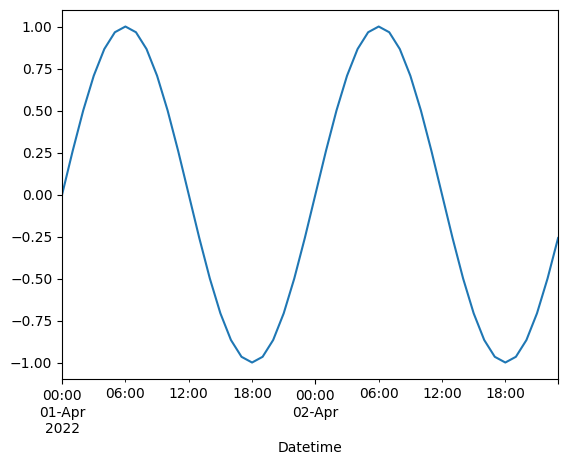

In [34]:
merged_df['2022-04-01':'2022-04-02'].hour_sin.plot.line()

<AxesSubplot: xlabel='Datetime'>

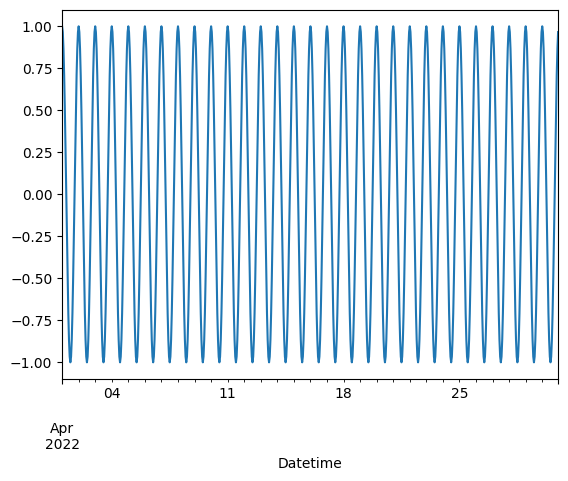

In [35]:
merged_df['2022-04-01':'2022-04-30'].hour_cos.plot.line()

In [36]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26304 entries, 2020-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PRE_INS       25829 non-null  float64
 1   TEM_SEN       25175 non-null  float64
 2   VL_LATITUDE   26304 non-null  float64
 3   PRE_MAX       25820 non-null  float64
 4   RAD_GLO       25825 non-null  float64
 5   PTO_INS       25595 non-null  float64
 6   TEM_MIN       25819 non-null  float64
 7   VL_LONGITUDE  26304 non-null  float64
 8   UMD_MIN       25583 non-null  float64
 9   PTO_MAX       25579 non-null  float64
 10  VEN_DIR       25422 non-null  float64
 11  CHUVA         25829 non-null  float64
 12  PRE_MIN       25820 non-null  float64
 13  UMD_MAX       25583 non-null  float64
 14  VEN_VEL       25408 non-null  float64
 15  PTO_MIN       25579 non-null  float64
 16  TEM_MAX       25819 non-null  float64
 17  TEN_BAT       25829 non-null  floa

In [37]:
merged_df.VEN_DIR.describe()

count    25422.000000
mean       162.483400
std         95.167458
min          1.000000
25%         88.000000
50%        127.000000
75%        266.000000
max        360.000000
Name: VEN_DIR, dtype: float64

In [38]:
merged_df.VEN_VEL.describe()

count    25408.000000
mean         2.480727
std          1.809553
min          0.200000
25%          1.200000
50%          1.900000
75%          3.100000
max         13.300000
Name: VEN_VEL, dtype: float64

In [39]:
from metpy.calc import wind_components
from metpy.units import units
def transform_wind(wind_speed, wind_direction, comp_idx):
    """
    Calculate the U or V wind vector component from the speed and direction.
    comp_idx = 0 --> computes the U component
    comp_idx = 1 --> computes the V component
    """
    return wind_components(wind_speed * units('m/s'), wind_direction * units.deg)[comp_idx].magnitude

In [40]:
merged_df['wind_u'] = merged_df.apply(lambda x: transform_wind(x.VEN_VEL, x.VEN_DIR, 0),axis=1)
merged_df['wind_v'] = merged_df.apply(lambda x: transform_wind(x.VEN_VEL, x.VEN_DIR, 1),axis=1)

In [41]:
merged_df[['wind_u', 'wind_v']].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26304 entries, 2020-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   wind_u  25408 non-null  float64
 1   wind_v  25408 non-null  float64
dtypes: float64(2)
memory usage: 1.6 MB


In [42]:
merged_df.shape

(26304, 33)

In [43]:
merged_df['wind_u'] = wind_u_comp

NameError: name 'wind_u_comp' is not defined

# Load ERA5 data

In [ ]:
import pandas as pd
df_era5 = pd.read_csv('../data/numerical_models/ERA5_A652_1997-01-01_2021-12-31.csv')
df_era5.head()

In [ ]:
df_era5.info()